In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters, report_fit

In [9]:
# constants
pi = 3.14159
# variables
mass = np.array([0.0499,0.0998,0.1497,0.1996,0.2495,0.2994,0.3493])
sigma_mass = np.array([0.0001,0.000141421,0.000173205,0.0002,0.000223607,0.000244949,0.000264575])
period = np.array([0.6825,0.842,0.967,1.1215,1.2055,1.3015,1.39])
sigma_period = np.array([0.025,0.025,0.025,0.025,0.025,0.025,0.025])

In [10]:
mass = mass + (mass / 3)

In [11]:
# calculations
k = 4 * pi**2 * mass / period**2
relative_uncertainty = np.sqrt( (2*sigma_period/period)**2 + (sigma_mass/mass)**2 )
sigma_k = k * relative_uncertainty

In [12]:
# fitting to find k
def linear(x,gradient,b):
    return gradient*x + b

model = Model(linear,independent_vars=['x'])
params = Parameters()
params.add('gradient',value=8,vary=True)
params.add('b',value=0.0001,vary=True)


fit = model.fit(period**2, x= mass, params=params, weights = 2/sigma_period)
slope = np.round(fit.values['gradient'],3)
intercept = np.round(fit.values['b'],3)
print(fit.values)
print(fit.fit_report())

{'gradient': 3.696803786151495, 'b': 0.22285071428316483}
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 22.3140362
    reduced chi-square = 4.46280724
    Akaike info crit   = 12.1151403
    Bayesian info crit = 12.0069606
    R-squared          = -12.1460641
[[Variables]]
    gradient:  3.69680379 +/- 0.07500596 (2.03%) (init = 8)
    b:         0.22285071 +/- 0.02231773 (10.01%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(gradient, b) = -0.8944


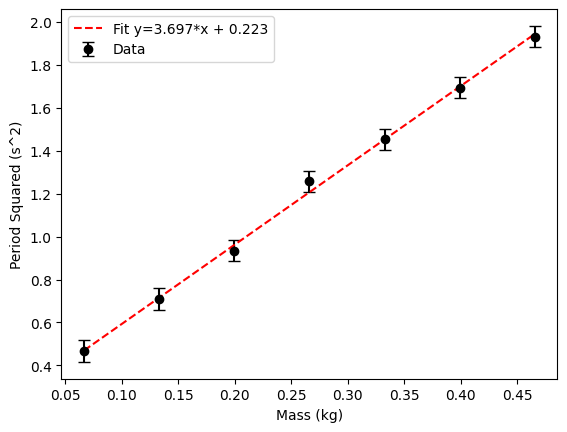

In [14]:
# plotting
plt.errorbar(mass, period**2, yerr=2*sigma_period, fmt='ko', capsize=4, label='Data')
plt.plot(mass,linear(mass,slope,intercept),'--r',label='Fit y='+str(slope)+'*x + '+str(intercept))
plt.xlabel('Mass (kg)')
plt.ylabel('Period Squared (s^2)')
plt.legend()

In [8]:
print(np.mean(k))

6.180657266398681


In [15]:
print(mass)

[0.06653333 0.13306667 0.1996     0.26613333 0.33266667 0.3992
 0.46573333]
